<a href="https://colab.research.google.com/github/rdemarqui/studies/blob/master/Central_limit_theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Central limit theorem

In probability theory, the central limit theorem (CLT) establishes that, in many situations, for identically distributed independent samples, the standardized sample mean tends towards the **standard normal distribution** even if the original variables themselves **are not normally distributed**.

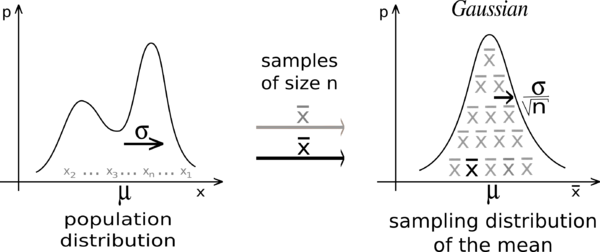

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
sns.set_theme()

## Creating data

In [3]:
# Creating random data distribution
def random_dataset(min_sample=0, max_sample=100, min_scale=0, max_scale=100, seed=42):
  """
    min_scale and max_scale: refers to category quantity.
    min_sample and max sample: refers to de min a max sample per cetegory
  """
  random.seed(seed)
  list_numbers = []
  for scale in list(range(min_scale, max_scale)):
    temp_data = [scale] * random.randint(min_sample, max_sample)
    list_numbers += temp_data

  df = pd.DataFrame(list_numbers, columns=['value'])
  return df

In [4]:
# Creating dataset
df = random_dataset()
print(f"Dataset shape: {df.shape}")
print(f"Dataset categories quantity: {len(df['value'].unique())}")

Dataset shape: (4791, 1)
Dataset categories quantity: 99


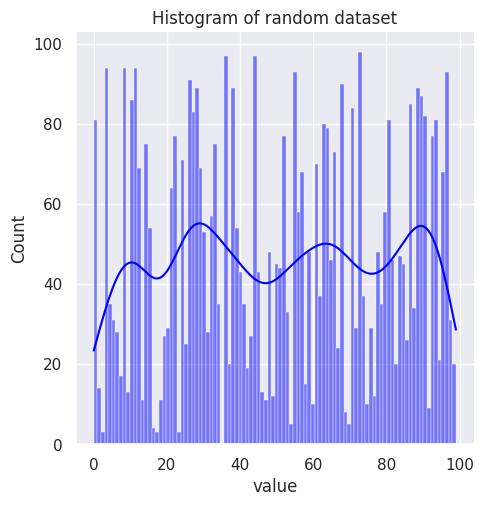

In [5]:
# Plotting dataset distribution
sns.displot(df['value'], bins=100, kde=True, color='blue')
plt.title('Histogram of random dataset');

## Calculating mean of samples

In [6]:
def sample_mean(dataframe, n_samples, n_tries, seed):
  """
  n_samples: Number of samples collected in each try
  n_tries: Number of tries
  """
  random.seed(seed)
  pseudo_random = random.sample(range(1, n_tries*5), n_tries)
  samples_mean = []

  for random_seed in pseudo_random:
    random_values = pd.DataFrame(dataframe['value'].sample(n=n_samples, random_state=random_seed))
    mean = random_values.mean()[0]
    samples_mean.append(mean)
  
  return samples_mean

In [7]:
# Creating sample data
mean_50samples = sample_mean(dataframe=df, n_samples=50, n_tries=10, seed=42)
mean_100samples = sample_mean(dataframe=df, n_samples=100, n_tries=10, seed=42)
mean_250samples = sample_mean(dataframe=df, n_samples=250, n_tries=10, seed=42)
mean_500samples = sample_mean(dataframe=df, n_samples=500, n_tries=10, seed=42)

## Plotting samples distribution mean

The larger the sample, the closer the distribution is to the mean (smaller standard deviation).

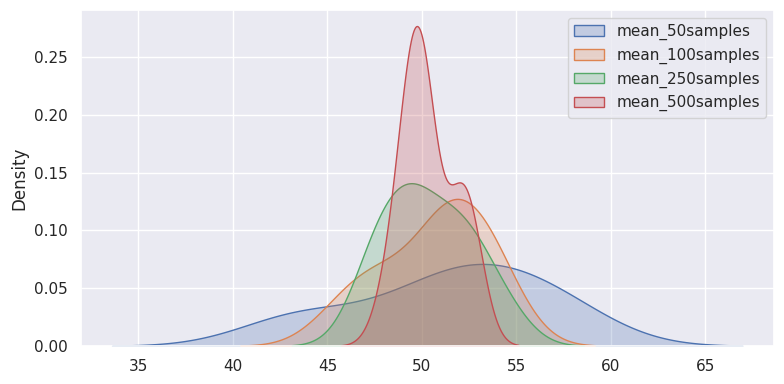

In [8]:
# Plotting distributions
fig, ax = plt.subplots(figsize=(8, 4))
sns.kdeplot(data=mean_50samples, label='mean_50samples', fill=True, ax=ax)
sns.kdeplot(data=mean_100samples, label='mean_100samples', fill=True, ax=ax)
sns.kdeplot(data=mean_250samples, label='mean_250samples', fill=True, ax=ax)
sns.kdeplot(data=mean_500samples, label='mean_500samples', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()